In [157]:
import pandas as pd 
import xgboost as x
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
tr=pd.read_csv(r"pdata\train.csv",index_col="PassengerId")
tr=pd.DataFrame(tr)

In [159]:
tr=tr.drop(["Cabin","Ticket","Name"],axis=1)

In [160]:
tr["Age"]=tr["Age"].fillna(tr["Age"].mean())
tr["Embarked"]=tr["Embarked"].fillna(tr["Embarked"].mode)


In [161]:
tr.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [130]:
tr["Embarked"].value_counts()


S                                                                                                                                                                                                      644
C                                                                                                                                                                                                      168
Q                                                                                                                                                                                                       77
<bound method Series.mode of PassengerId\n1      S\n2      C\n3      S\n4      S\n5      S\n      ..\n887    S\n888    S\n889    S\n890    C\n891    Q\nName: Embarked, Length: 891, dtype: object>      2
Name: Embarked, dtype: int64

In [131]:
tr=pd.get_dummies(tr)
tr.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,"Embarked_<bound method Series.mode of PassengerId\n1 S\n2 C\n3 S\n4 S\n5 S\n ..\n887 S\n888 S\n889 S\n890 C\n891 Q\nName: Embarked, Length: 891, dtype: object>",Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [132]:
tr = tr.drop(tr.columns[8], axis=1)


In [135]:
y=tr["Survived"]
tr=tr.drop("Survived",axis=1)

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
regressor = x.XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(tr, y, test_size=0.2, random_state=42)


In [146]:
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.19553072625698323


In [147]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


<AxesSubplot:>

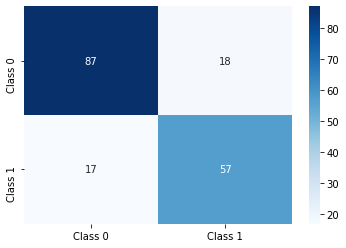

In [148]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib as plt
cm = confusion_matrix(y_test, y_pred)
class_labels = ['Class 0', 'Class 1']
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)


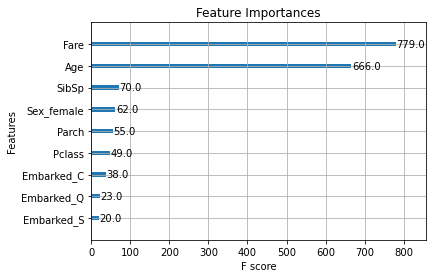

In [149]:
# Plot feature importances
import matplotlib.pyplot as plt
x.plot_importance(regressor)
plt.title('Feature Importances')
plt.show()

In [150]:
x=regressor.predict_proba(tr)
x

array([[0.9555051 , 0.0444949 ],
       [0.00123978, 0.9987602 ],
       [0.2588768 , 0.7411232 ],
       ...,
       [0.98799485, 0.01200513],
       [0.0237394 , 0.9762606 ],
       [0.919181  , 0.08081903]], dtype=float32)

In [151]:
num_trees = regressor.best_iteration
# Print the number of trees
print(f"Number of trees: {num_trees}")

Number of trees: 99


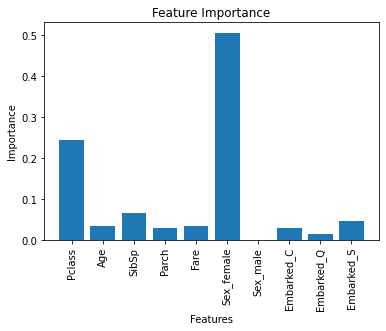

In [152]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have trained an XGBoost model called 'regressor'
# and have a feature_names list with the names of your features
feature_names=X_test.columns
# Retrieve the feature importance levels
importance = regressor.feature_importances_



# Plot the feature importance levels
plt.bar( feature_names,importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


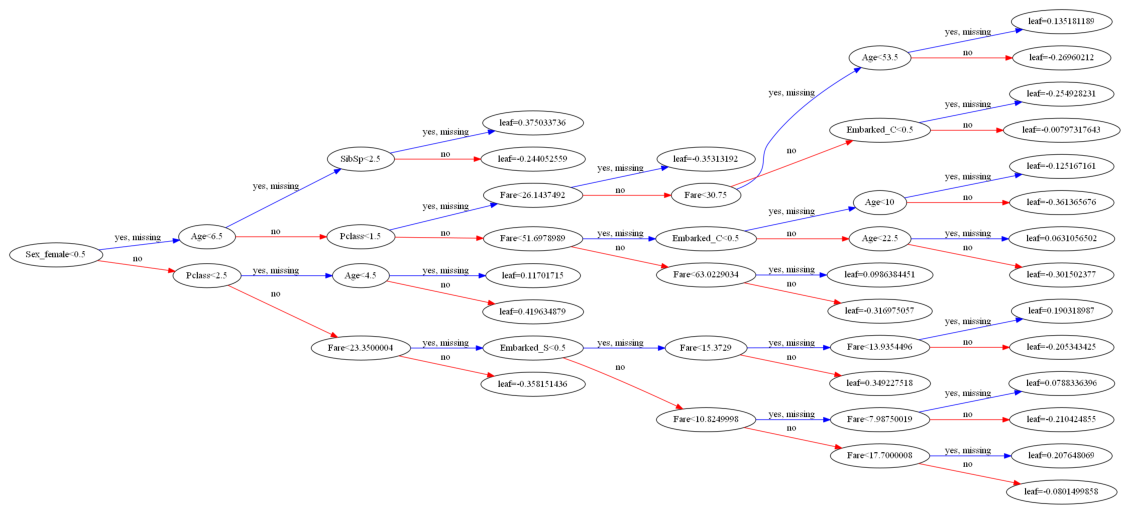

In [156]:
import xgboost as xgb
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

# Plot the second tree (index 1) from the XGBoost model
xgb.plot_tree(regressor, num_trees=1, rankdir='LR', ax=ax)

# Show the tree plot
plt.show()

In [154]:
import xgboost as xgb

# Assuming you have trained your XGBoost classifier and it is stored in 'classifier'

# Get the underlying Booster object from the XGBoost classifier
booster = regressor.get_booster()

# Loop through all the trees
for i in range(regressor.n_estimators):
    # Get the tree structure for the i-th tree
    tree_structure = booster.get_dump()[i]
    
    # Print the root node information for the i-th tree
    print(f"Root of Tree {i}:\n{tree_structure.splitlines()[0]}")


Root of Tree 0:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 1:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 2:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 3:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 4:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 5:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 6:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 7:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 8:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 9:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 10:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 11:
0:[Fare<7.1333499] yes=1,no=2,missing=1
Root of Tree 12:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 13:
0:[Fare<254.947906] yes=1,no=2,missing=1
Root of Tree 14:
0:[Sex_female<1] yes=1,no=2,missing=1
Root of Tree 15:
0:[Fare<7.1333499] yes=1,no=2,missing=1
Root of Tree 16:
0:[Fare<6.96249962] yes=1,no=2,missing=1
Root of Tree 17:
0:[Fare<7.91040039] yes=1,no=2,missing=1
Root of